In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import matplotlib.patches as mpatches

**Dataset Description:** 

Restaurants and markets in Los Angeles county are regularly inspected for health code violations. 

**Content**

The data covers health code inspections (inspections.csv) and health code violations (violation.csv). More details about the two files is provided in the sections below.

**Theme**

The subject of this project is to explore How restaurants handle violations in LA. First of all, we pick up what are the worst scoring restaurants in LA. Then, we check those restaurants' scores over time to depict their reaction. Finally, We figure out what violations do these restaurants have trouble fixing and what violations had the greatest impact on score.

In [6]:
#Load data 
df_Ins = pd.read_csv('inspections.csv')
df_Vio = pd.read_csv('violations.csv')

#Merge data
df = df_Ins.merge(df_Vio, left_on='serial_number', right_on='serial_number', how='left')

#Data cleaning 
df['activity_date'] = pd.to_datetime(df['activity_date'])
df['year'] = df['activity_date'].dt.year
df['month'] = df['activity_date'].dt.month

#Create the order index for later 
df["time"] = df['activity_date'].apply(lambda x:x.strftime('%Y%m')) 
df.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,...,serial_number,service_code,service_description,points,violation_code,violation_description,violation_status,year,month,time
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,DAHDRUQZO,1,ROUTINE INSPECTION,1.0,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,2017,5,201705
1,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,DAHDRUQZO,1,ROUTINE INSPECTION,1.0,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,2017,5,201705
2,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,DAL3SBUE0,1,ROUTINE INSPECTION,1.0,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,2017,4,201704
3,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,DAL3SBUE0,1,ROUTINE INSPECTION,1.0,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,2017,4,201704
4,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,DAL3SBUE0,1,ROUTINE INSPECTION,1.0,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,2017,4,201704


In [7]:
#Select the columns we want to use.
df1 = df[['facility_address', 'facility_name', 'facility_city', 'grade', 'score', 'serial_number', 'points',
          'violation_description', 'violation_status','time', 'activity_date', 'year']]

#replace the NaN value
df1['points'].fillna(0, inplace = True) 
df1['violation_description'].fillna('No violation', inplace = True)
df1['violation_status'].fillna('No violation', inplace = True)

#Check data
df1.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,facility_address,facility_name,facility_city,grade,score,serial_number,points,violation_description,violation_status,time,activity_date,year
0,17660 CHATSWORTH ST,HOVIK'S FAMOUS MEAT & DELI,GRANADA HILLS,A,98,DAHDRUQZO,1.0,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,201705,2017-05-09,2017
1,17660 CHATSWORTH ST,HOVIK'S FAMOUS MEAT & DELI,GRANADA HILLS,A,98,DAHDRUQZO,1.0,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,201705,2017-05-09,2017
2,3615 PACIFIC COAST HWY,SHAKEY'S PIZZA,TORRANCE,A,94,DAL3SBUE0,1.0,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,201704,2017-04-10,2017
3,3615 PACIFIC COAST HWY,SHAKEY'S PIZZA,TORRANCE,A,94,DAL3SBUE0,1.0,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,201704,2017-04-10,2017
4,3615 PACIFIC COAST HWY,SHAKEY'S PIZZA,TORRANCE,A,94,DAL3SBUE0,1.0,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,201704,2017-04-10,2017


**Research Question 1: What are the worst scoring restaurants in LA?**

In [8]:
#Data cleaning
df_Ins['facility_name'] = df_Ins['facility_name'].str.upper() 
df_Ins.activity_date = pd.to_datetime(df_Ins.activity_date)

#Merge data
df3 = pd.merge(df_Ins, df_Vio, on = 'serial_number', how = 'left')

#Data cleaning
df3['month'] = df3['activity_date'].dt.month
df3['year'] = df3['activity_date'].dt.year
df3.sort_values(by = 'activity_date', ascending = True, inplace = True)

In [9]:
#Filter the resturants that had the worst first time scores. 
df4 = df3.groupby(by = ['facility_name', 'activity_date']).first()
df4 = df4.groupby('facility_name').head(1)
df4.reset_index(level=0, inplace=True)
pd.to_numeric(df4.score)
df4 = df4.reset_index()
df4 = df4.sort_values(by = 'score',ascending = True )
df4 = df4.head(10)

In [10]:
df4.head()

,activity_date,facility_name,employee_id,facility_address,facility_city,facility_id,facility_state,facility_zip,grade,owner_id,...,score,serial_number,service_code,service_description,points,violation_code,violation_description,violation_status,month,year
33174,2015-09-28,THREE BEARS BAR-B-Q,EE0000958,11916 S FIGUEROA ST,LOS ANGELES,FA0002898,CA,90061,,OW0001713,...,65,DAVTNZVG3,1,ROUTINE INSPECTION,1.0,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,9,2015
11519,2015-09-10,FORTUNE CORNER CHINESE FOOD,EE0000882,2210 MARINE AVE STE J,GARDENA,FA0170261,CA,90249,,OW0178072,...,66,DAXAEXIJS,1,ROUTINE INSPECTION,1.0,F042,"# 42. Toilet facilities: properly constructed,...",OUT OF COMPLIANCE,9,2015
28698,2017-06-21,SOL NIGHT CLUB,EE0000829,313 E CARSON ST,CARSON,FA0033740,CA,90745,,OW0033411,...,67,DA0JQS1JM,1,ROUTINE INSPECTION,11.0,F022,# 22. Sewage and wastewater properly disposed,OUT OF COMPLIANCE,6,2017
2063,2015-11-21,ANTOJITOS Y GARNACHERIA DONA ROSITA,EE0001025,6210 S VERMONT AVE,LOS ANGELES,FA0179198,CA,90044-3720,,OW0184788,...,68,DAYXMYDJH,1,ROUTINE INSPECTION,0.0,F049,# 50. Impoundment of unsanitary equipment or food,OUT OF COMPLIANCE,11,2015
36490,2017-12-21,YURI'S AUTHENTIC TACOS AND MEXICAN RESTAURANT,EE0001049,5165 E WHITTIER BLVD,LOS ANGELES,FA0250585,CA,90022-3900,,OW0244672,...,68,DAH3YQM0T,1,ROUTINE INSPECTION,1.0,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,12,2017


**Insights of Research Question 1:** TEREE BEARS BAR-B-Q got the worst score: 65

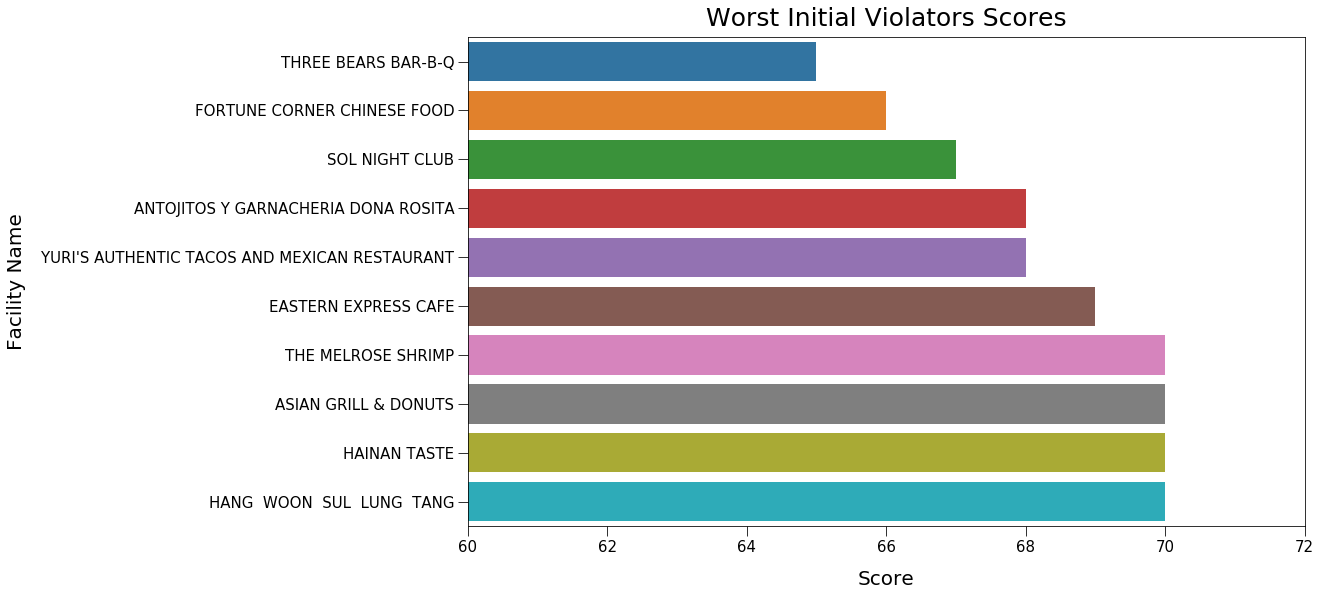

In [11]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x = 'score', y = 'facility_name', data = df4)
ax.tick_params(axis='x',length = 10.0, labelsize = 15)
ax.tick_params(axis='y',length = 10,  labelsize = 15)
plt.title("Worst Initial Violators Scores", fontsize=25, y=1.01)
plt.xlabel("Score", fontsize=20, labelpad=15)
plt.ylabel("Facility Name", fontsize=20, labelpad=15)
plt.xlim(60,72)
plt.show()

** Research Question 2: How do resturants respond to bad health inspection scores. Do they improve or do they stay the same?**

In [12]:
#Create subset for worst restaurants
df5 =  df3[df3['facility_name'].isin(['THREE BEARS BAR-B-Q', 
                   'FORTUNE CORNER CHINESE FOOD', 
                   'SOL NIGHT CLUB', 
                   'YURI\'S AUTHENTIC TACOS AND MEXICAN RESTAURANT', 
                   'ANTOJITOS Y GARNACHERIA DONA ROSITA', 
                   'EASTERN EXPRESS CAFE', 
                   'THE MELROSE SHRIMP', 
                   'FUEGO NIGHT CLUB', 
                   'HAINAN TASTE', 
                   'PHO 24 RIN'])]

**Insights of Research Question 2: ** There seem to be three kinds of responses that resturants take. One is to procrastinate and put off correcting all the violations until they have to be inspected again. The second is to immediatly correct most of the worst violations, the last is to just close down because they cannot correct the violations. But each of these resturants also never reach a perfect score. They just aim for 90 or an A and just stop.

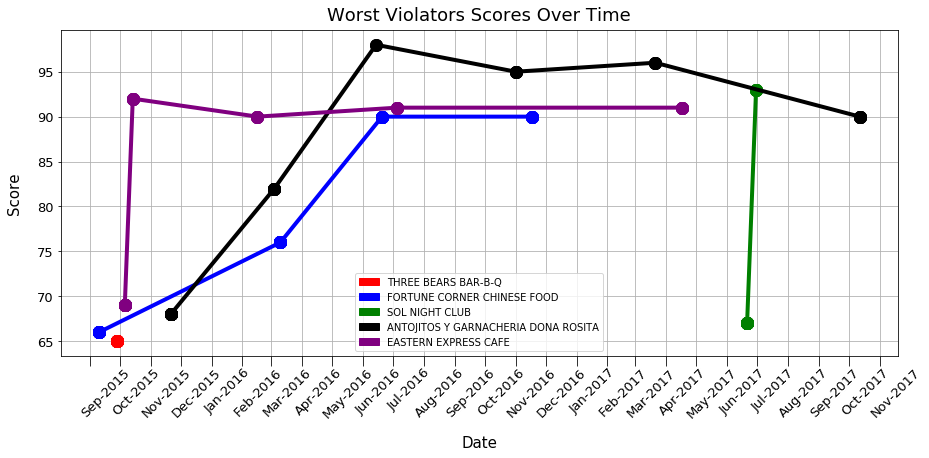

In [13]:
fig, ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation=45)
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b-%Y'))
ax.tick_params(axis='x', pad=-32,length=10.0, labelsize=13)
ax.tick_params(axis='y', labelsize=13)
#Plot the lines of scores of each restaurant over time.
plt.plot( 'activity_date', 'score', data=df5[df5.facility_name =='FORTUNE CORNER CHINESE FOOD'], marker='o', 
         markerfacecolor='blue', markersize=12, color='blue', linewidth=4)
plt.plot( 'activity_date', 'score', data=df5[df5.facility_name =='SOL NIGHT CLUB'], marker='o', 
         markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot( 'activity_date', 'score', data=df5[df5.facility_name =='THREE BEARS BAR-B-Q'], marker='o', 
         markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.plot( 'activity_date', 'score', data=df5[df5.facility_name =='ANTOJITOS Y GARNACHERIA DONA ROSITA'], marker='o',
         markerfacecolor='black', markersize=12, color='black', linewidth=4)
plt.plot( 'activity_date', 'score', data=df5[df5.facility_name =='EASTERN EXPRESS CAFE'], marker='o', 
         markerfacecolor='purple', markersize=12, color='purple', linewidth=4)
#Setting the different colors for the legend
red_patch = mpatches.Patch(color='red', label='THREE BEARS BAR-B-Q')
blue = mpatches.Patch(color='blue', label='FORTUNE CORNER CHINESE FOOD')
green = mpatches.Patch(color='green', label='SOL NIGHT CLUB')
black = mpatches.Patch(color='black', label='ANTOJITOS Y GARNACHERIA DONA ROSITA')
purple = mpatches.Patch(color='purple', label='EASTERN EXPRESS CAFE')
plt.legend(handles=[red_patch, blue, green, black, purple])
#Setting the lables and title
plt.title("Worst Violators Scores Over Time", fontsize=18, y=1.01)
plt.xlabel("Date", fontsize=15, labelpad=15)
plt.ylabel("Score", fontsize=15, labelpad=15)
plt.show();

**Research Question 3: What Violations do these Restaurants have trouble fixing? And What Violations had the greatest impact on score?**

In [14]:
#Create the subset
df7 = df1[(df1.facility_name == 'FORTUNE CORNER CHINESE FOOD') | (df1.facility_name == 'SOL NIGHT CLUB') | 
    (df1.facility_name == 'ANTOJITOS Y GARNACHERIA DONA ROSITA') | (df1.facility_name == 'EASTERN EXPRESS CAFE') |
    (df1.facility_name == 'THREE BEARS BAR-B-Q')].groupby(['facility_name', 'violation_description']).agg({
    'points':'mean',
    'score':'mean',
    'facility_address': 'count'
}).reset_index(level=['facility_name', 'violation_description'])

#Name columns & create new columns  
df7.columns = ['Restaurant', 'Violation Description', 'Avg_Points', 'Avg_Scores', 'Count']
df7['Losing Point'] = df7.Avg_Points * df7.Count
df7['Violation Description'] = df7['Violation Description'].apply(lambda x:x[6:])

#Check Data 
df7.head()

,Restaurant,Violation Description,Avg_Points,Avg_Scores,Count,Losing Point
0,ANTOJITOS Y GARNACHERIA DONA ROSITA,Food safety certification,2.0,75.0,2,4.0
1,ANTOJITOS Y GARNACHERIA DONA ROSITA,Adequate handwashing facilities supplied & acc...,2.0,68.0,1,2.0
2,ANTOJITOS Y GARNACHERIA DONA ROSITA,Proper hot and cold holding temperatures,4.0,79.0,2,8.0
3,ANTOJITOS Y GARNACHERIA DONA ROSITA,Time as a public health control; procedures & ...,4.0,82.0,1,4.0
4,ANTOJITOS Y GARNACHERIA DONA ROSITA,"Food in good condition, safe and unadulterated",2.0,68.0,1,2.0


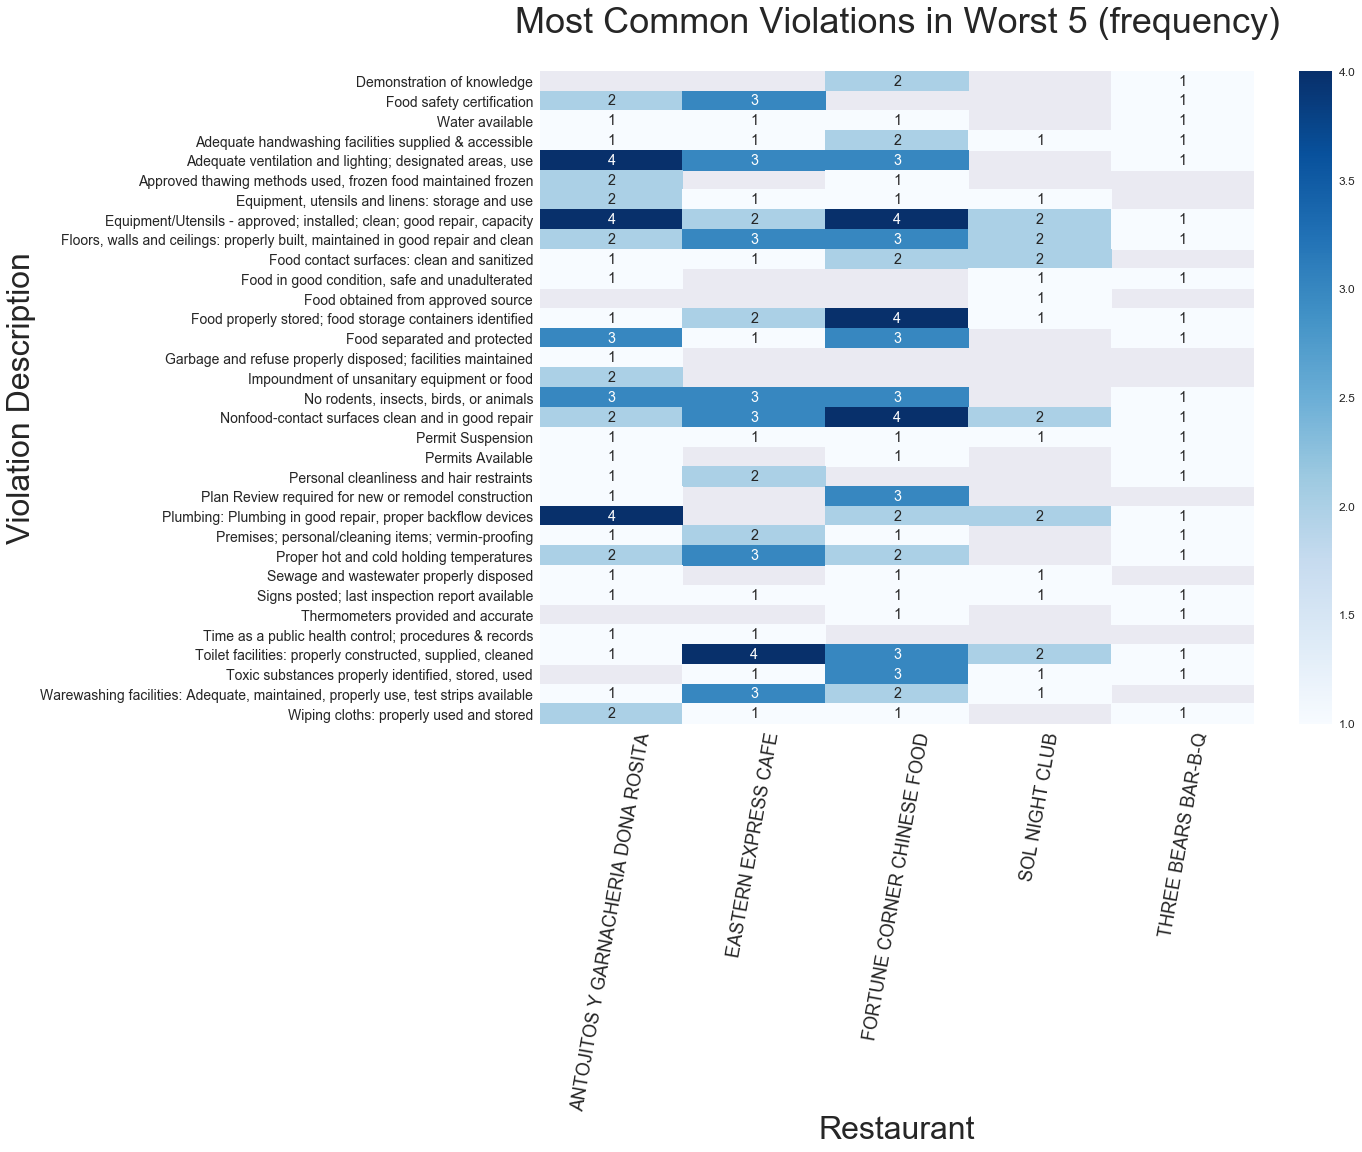

In [15]:
#Create the subset
df8 = df7[['Restaurant','Violation Description','Count']]

#Plot heatmap of frequency
plt.figure(figsize=(16,12))
sns.set(font_scale = 1.2)
sns.heatmap(df8.pivot(index='Violation Description', columns='Restaurant', values='Count'),  
            annot=True, fmt="g", cmap='Blues')
plt.title('Most Common Violations in Worst 5 (frequency)', fontsize = 36,  y = 1.05)
plt.xlabel('Restaurant', fontsize = 32)
plt.ylabel('Violation Description', fontsize= 32)
plt.xticks(fontsize=18, rotation='80')
plt.yticks(fontsize=14)
plt.show()

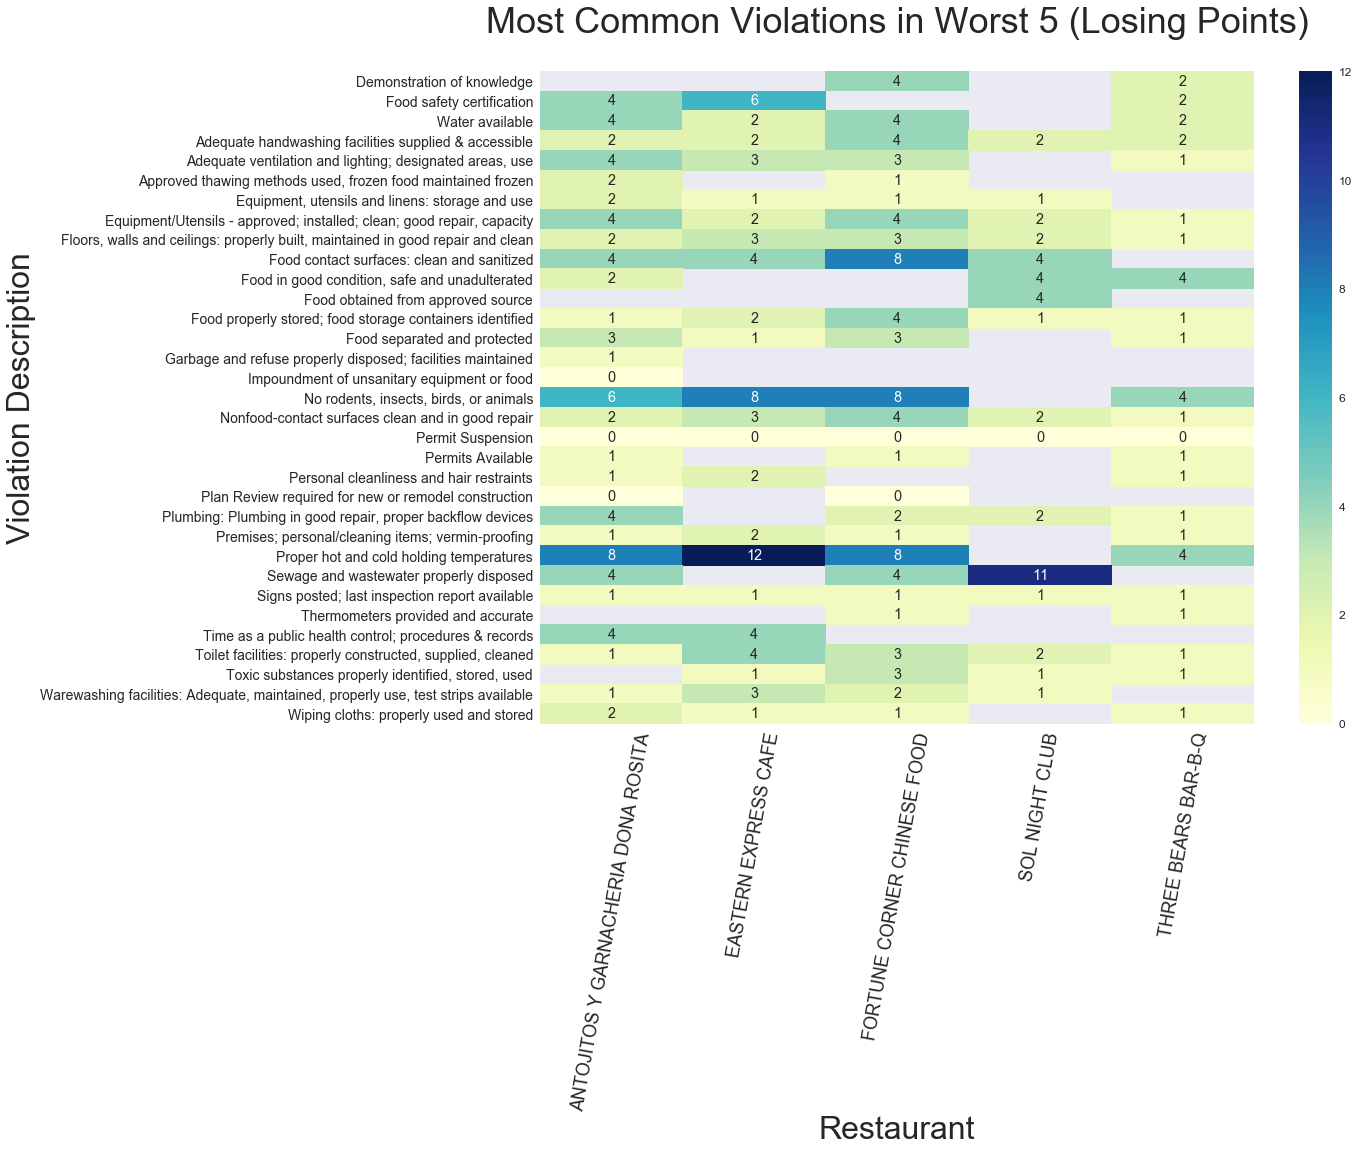

In [16]:
#Create the subset
df9 = df7[['Restaurant','Violation Description','Losing Point']]

#Plot heatmap of losing points
plt.figure(figsize=(16,12))
sns.set(font_scale = 1.2)
sns.heatmap(df9.pivot(index='Violation Description', columns='Restaurant', values='Losing Point'),  
            annot=True, fmt="g", cmap='YlGnBu')
plt.title('Most Common Violations in Worst 5 (Losing Points)', fontsize = 36,  y = 1.05)
plt.xlabel('Restaurant', fontsize = 32)
plt.ylabel('Violation Description', fontsize= 32)
plt.xticks(fontsize=18, rotation='80')
plt.yticks(fontsize=14)
plt.show()

In [17]:
#Filter more rows and focus on more frequency & losing points base on 50% metrics
df10 = df7.groupby('Violation Description').sum().reset_index()
df10.describe()

,Avg_Points,Avg_Scores,Count,Losing Point
count,33.000000,33.000000,33.000000,33.000000
mean,5.676768,260.750000,5.848485,8.818182
std,4.538022,98.657171,3.364532,7.221732
min,0.000000,67.000000,1.000000,0.000000
25%,4.000000,199.000000,3.000000,4.000000
50%,4.000000,298.000000,5.000000,8.000000
75%,6.000000,317.666667,8.000000,12.000000
max,19.000000,402.166667,13.000000,32.000000


**Insights of Research Question 3: ** Comparing heatmaps of the count and point losing, we found the most common violations of the worst are related to the equipment, however, these violations are not the main reason that they lose many points in the inspection. Most of the points that are lost are due to poor termperature for holding foods and pests in the restaurant. If you don't want to have a bad score on your health inspection, you have to focus on having proper storage temperatures and keeping pests away. 

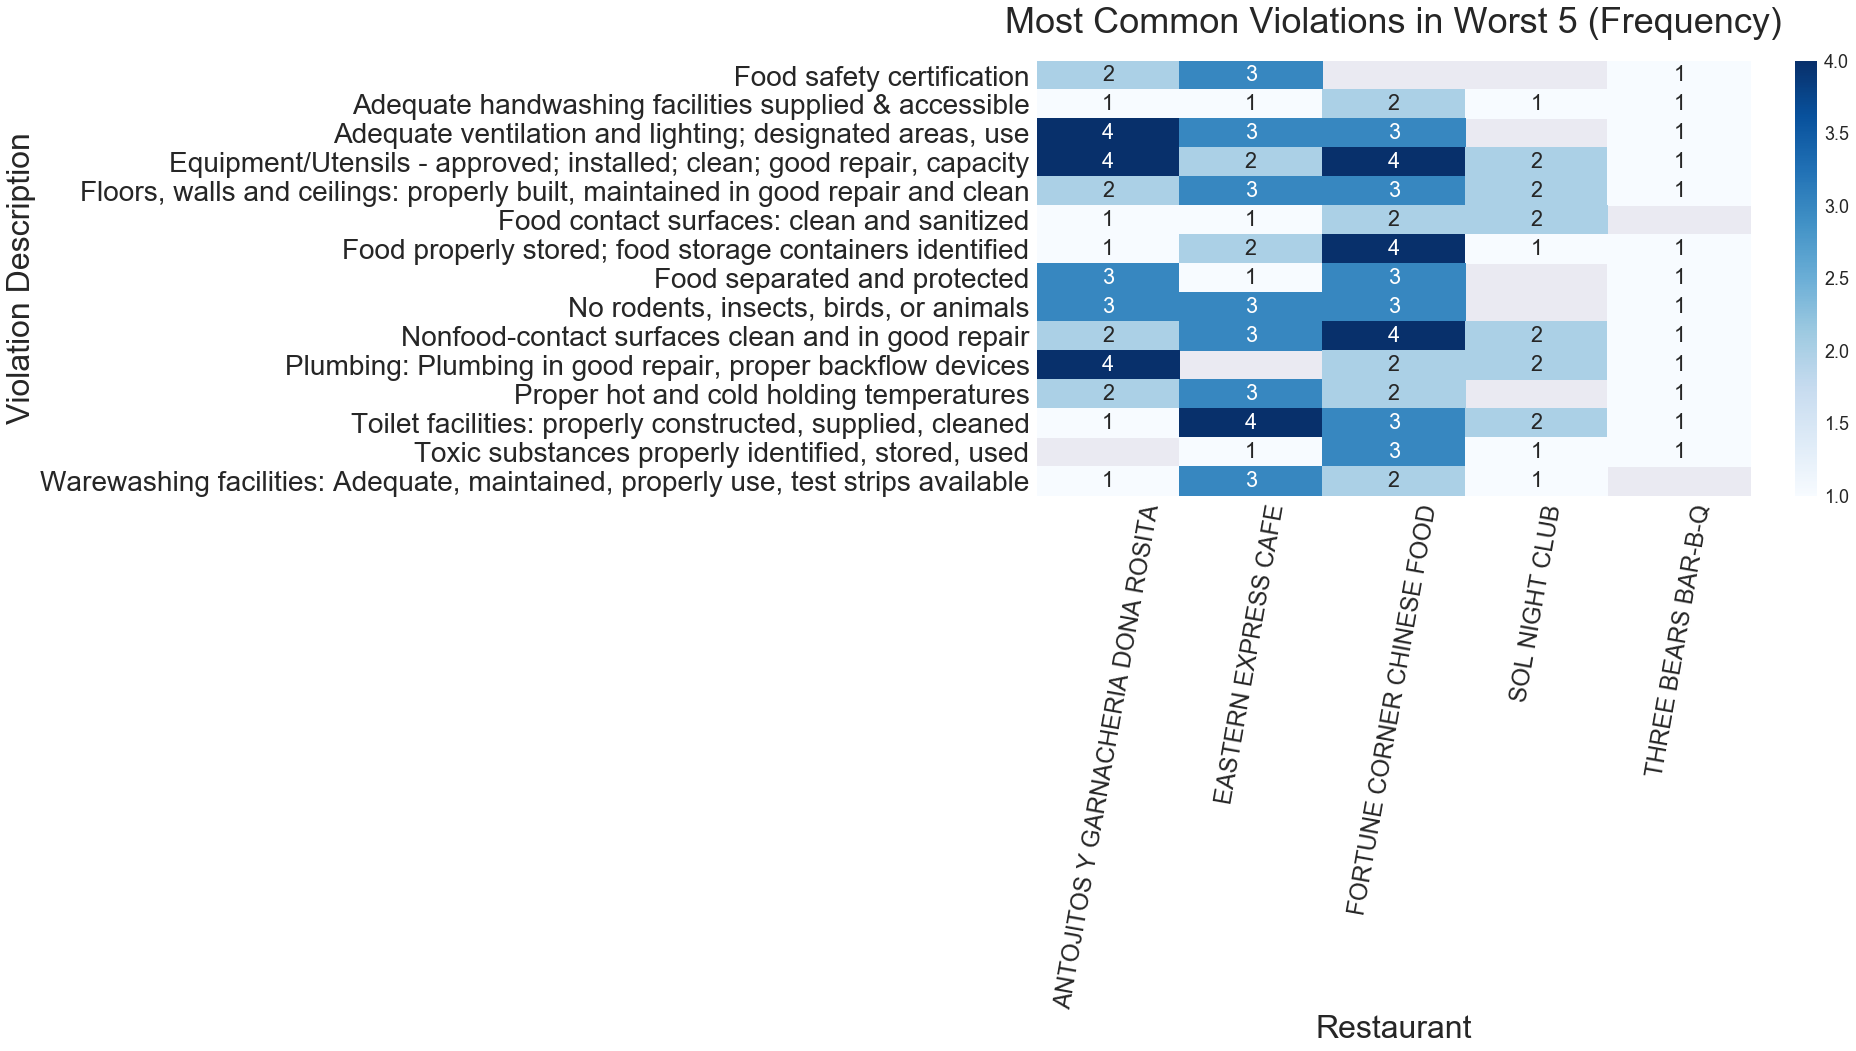

In [18]:
#Create the subset to focus on the data over 50% (median) count
df11 = df7[df7['Violation Description'].isin(df10[df10.Count > 5]['Violation Description'])]
df12 = df11[['Restaurant','Violation Description','Count']]

#Plot heatmap of frequency (50%)
sns.set(font_scale = 1.8)
plt.figure(figsize = (16, 8))
sns.heatmap(df12.pivot(index='Violation Description', columns='Restaurant', values='Count'),  
            annot=True, fmt="g", cmap='Blues')
plt.title('Most Common Violations in Worst 5 (Frequency)', fontsize = 36,  y = 1.05)
plt.xlabel('Restaurant', fontsize = 32)
plt.ylabel('Violation Description', fontsize= 32)
plt.xticks(fontsize = 24, rotation ='80')
plt.yticks(fontsize = 28)
plt.show()

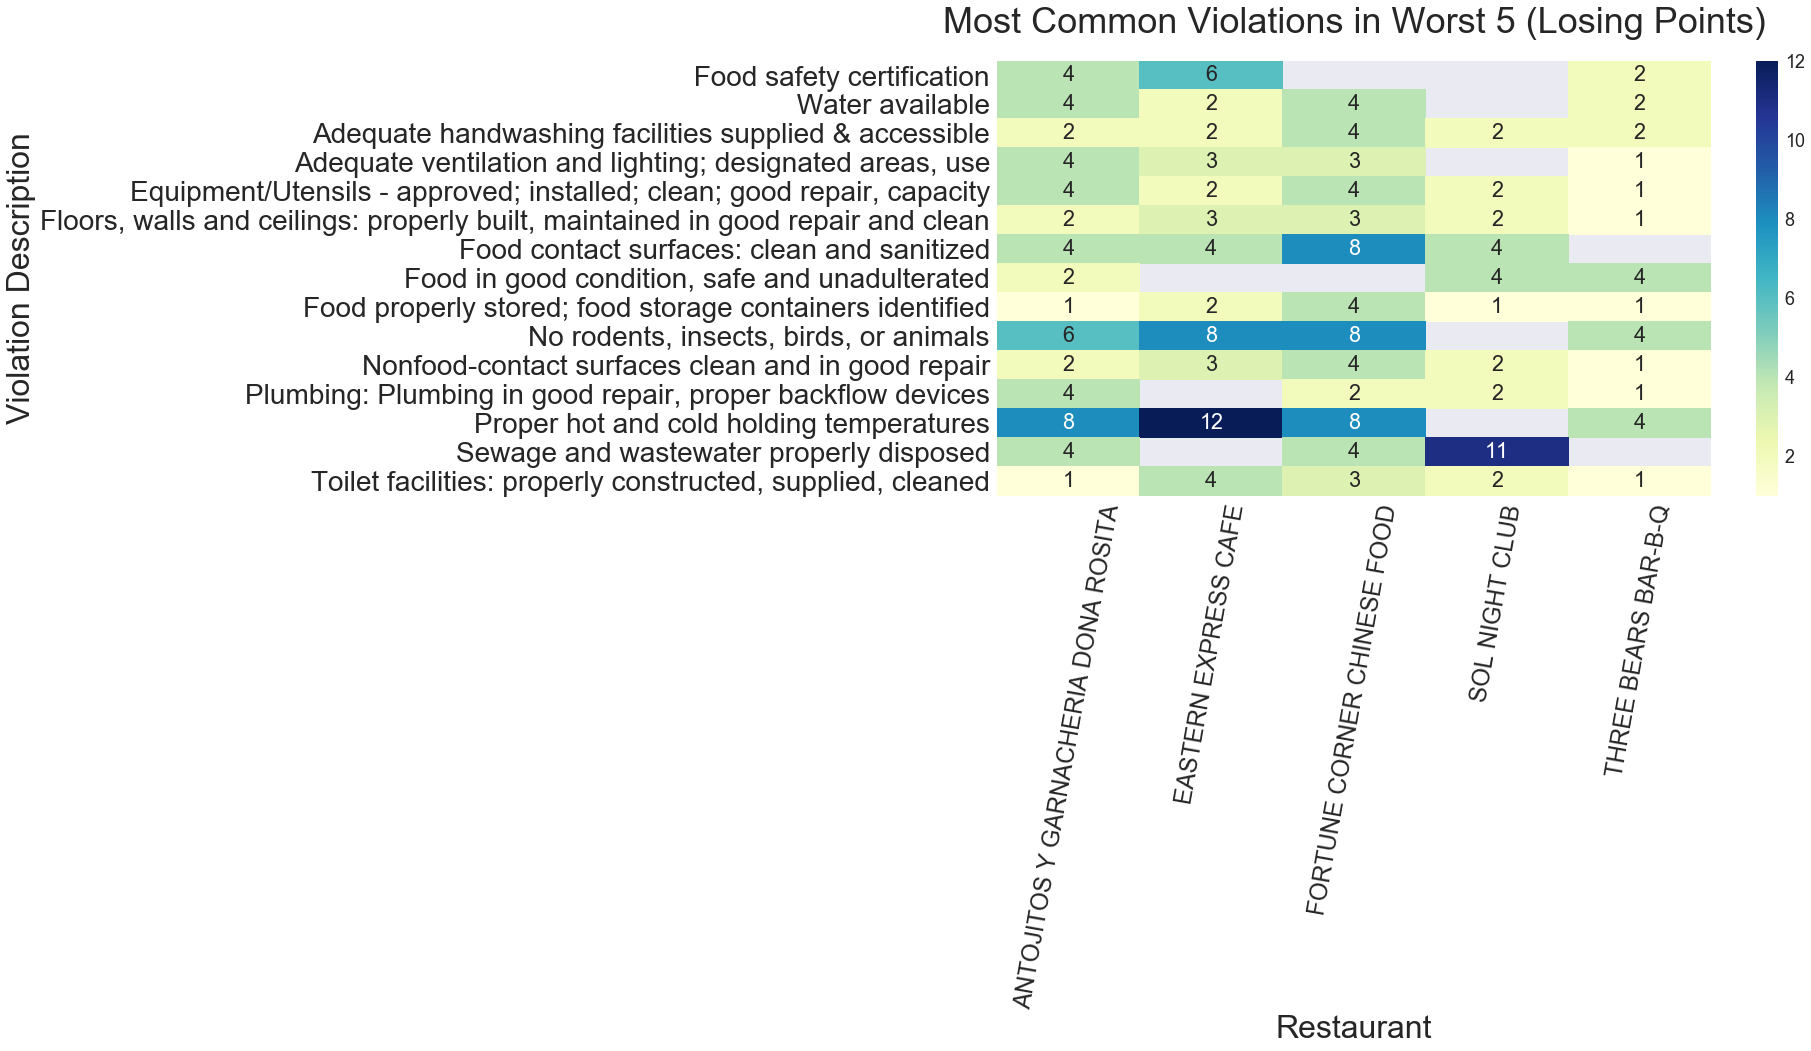

In [19]:
#Create the subset to focus on the data over 50% (median) losing point
df13 = df7[df7['Violation Description'].isin(df10[df10['Losing Point'] > 8]['Violation Description'])]
df14 = df13[['Restaurant','Violation Description','Losing Point']]

#Plot heatmap of losing point (50%)
sns.set(font_scale = 1.8)
plt.figure(figsize = (16, 8))
sns.heatmap(df14.pivot(index='Violation Description', columns='Restaurant', values='Losing Point'),  
            annot=True, fmt="g", cmap='YlGnBu')
plt.title('Most Common Violations in Worst 5 (Losing Points)', fontsize = 36,  y = 1.05)
plt.xlabel('Restaurant', fontsize = 32)
plt.ylabel('Violation Description', fontsize= 32)
plt.xticks(fontsize = 24, rotation ='80')
plt.yticks(fontsize = 28)
plt.show()

**Extra Question 1: What are the most common health code violations for losing points?**

In [20]:
#Aggregate data
df2 = df1.groupby(['violation_description']).agg({
    'points':'mean',
    'facility_address':'count'
})

#Create the ‘Losing point’ columns as metric to evaluate the losing points of violation
df2['Losing_Points'] = df2.points * df2.facility_address

#Name columns
df2.columns = ['Avg_points', 'Count', 'Losing_Points']
df2 = df2[(df2.Avg_points > 0) & (df2.Losing_Points.nlargest(10))].reset_index()
df2 = df2.sort_values(by = 'Losing_Points', ascending = False)
df2['violation_description'] = df2['violation_description'].apply(lambda x:x[6:])

#Check data
df2.head()

,violation_description,Avg_points,Count,Losing_Points
1,Proper hot and cold holding temperatures,2.982532,40416,120542.0
9,"Floors, walls and ceilings: properly built, ma...",1.000000,101243,101243.0
4,Nonfood-contact surfaces clean and in good repair,1.000000,99451,99451.0
2,Food contact surfaces: clean and sanitized,2.716224,34196,92884.0
5,Equipment/Utensils - approved; installed; clea...,1.000000,79043,79043.0


**Insights of Extra Question 1: **
We surprisingly found that the most common violation of restaurants is related to temperature (shown as below). Be careful about temperature if you running a restaurant. 

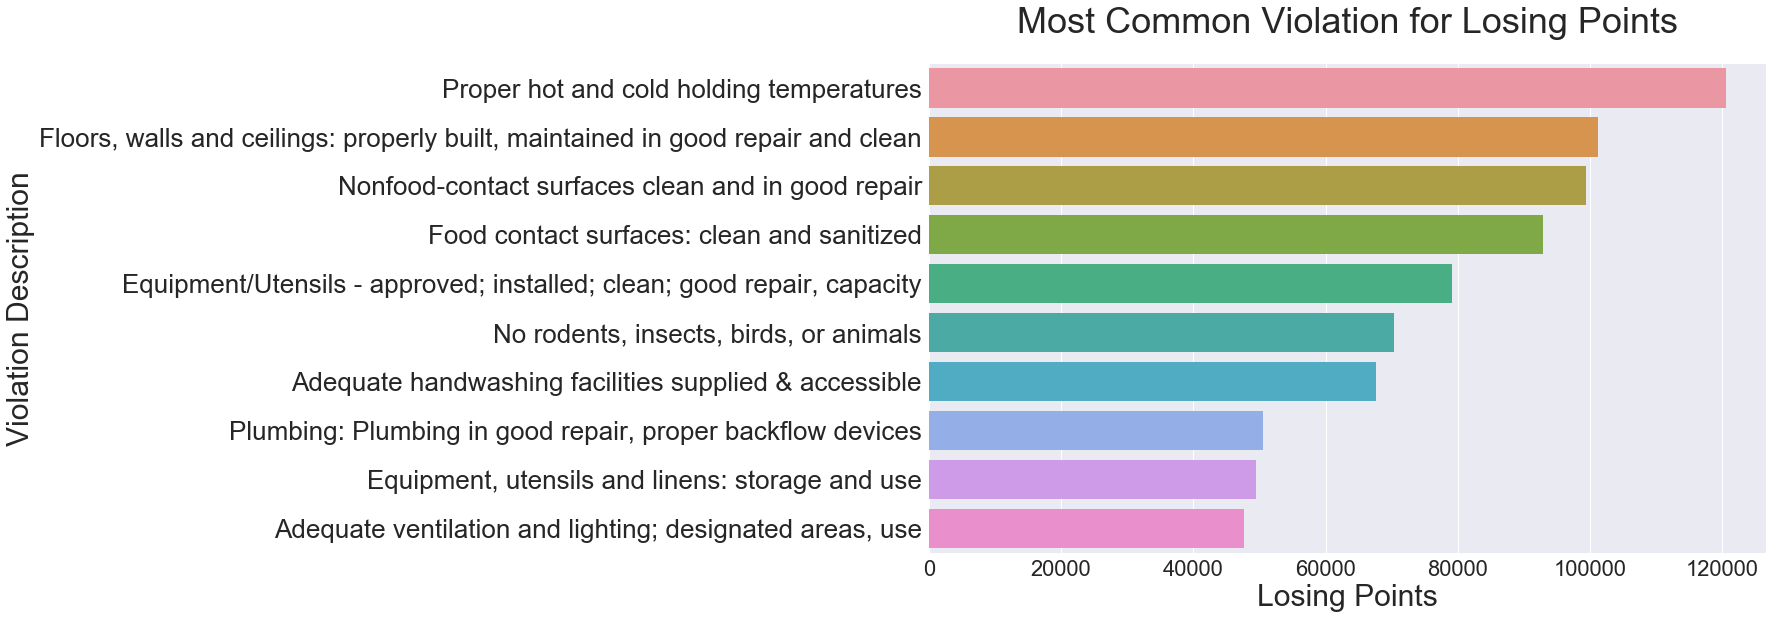

In [21]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x = 'Losing_Points', y = 'violation_description', data = df2, ax = ax)
plt.title('Most Common Violation for Losing Points',fontsize= 36, y = 1.05 )
plt.xlabel('Losing Points',fontsize=30)
plt.ylabel('Violation Description', fontsize= 30)
plt.xticks(fontsize=22)
plt.yticks(fontsize=26)
plt.show();

**Extra Question 2: What is the trend of health code violations over time?**

In [22]:
#Used the means as benchmark
df6 = df1.groupby(['time']).agg({
    'score':'mean',
    'points' : 'mean'
}).dropna().sort_index().reset_index()

#Create the new columns as metrics
df6['score_scaled'] = (df6.score - df6.score.min()) /(df6.score.max() - df6.score.min())
df6['mean'] = df6.score.mean()
df6['time'] = df6['time'].apply(lambda x:x[4:]) + '/' + df6['time'].apply(lambda x:x[2:4])
df6.head()

,time,score,points,score_scaled,mean
0,07/15,91.672236,1.352098,0.332266,91.93938
1,08/15,91.638657,1.347304,0.306213,91.93938
2,09/15,91.411911,1.352729,0.130292,91.93938
3,10/15,91.443298,1.340911,0.154644,91.93938
4,11/15,91.789121,1.302578,0.422951,91.93938


**Insights of Extra Question 1: **
As we can see from the graph above, the performance of 2016 is better than other years. The scores for 2016 are higher than the average.

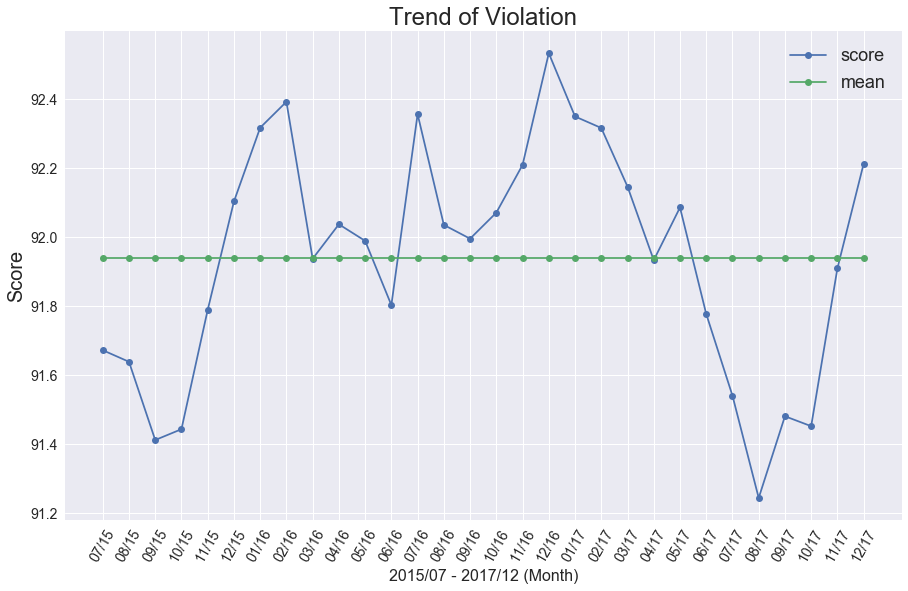

In [23]:
fig, ax = plt.subplots(figsize=(15, 9))
plt.style.use('ggplot')
df6[['score', 'mean']].plot(marker='o', ax = ax)
plt.title('Trend of Violation',fontsize=24)
plt.xlabel('2015/07 - 2017/12 (Month)',fontsize=16)
plt.ylabel('Score', fontsize=20)
plt.xticks(df6.index, df6.time, fontsize=14, rotation='60')
plt.yticks(fontsize=14)
plt.show();